<a href="https://colab.research.google.com/github/SuperericJ/EricJang/blob/main/%5BLab_session_5%5D_Data_Preprocessing_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8      25.0   
1          NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2         Audi       90  Compact       25.9   29.1       32.3      20.0   
3         Audi      100  Midsize        NaN   37.7       44.6      19.0   
4          BMW     535i  Midsize        NaN   30.0        NaN      22.0   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0         31.0                None      Front  ...        5.0   177.0   
1         25.0  Driver & Passenger      Front  ...        5.0   195.0   
2         26.0         Driver only      Front  ...        5.0   180.0   
3         26.0  Driver & Passenger        NaN  ...        6.0   193.0   
4         30.0                 NaN       Rear  ...        4.0   186.0   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0      102.0   68.0         37.0     

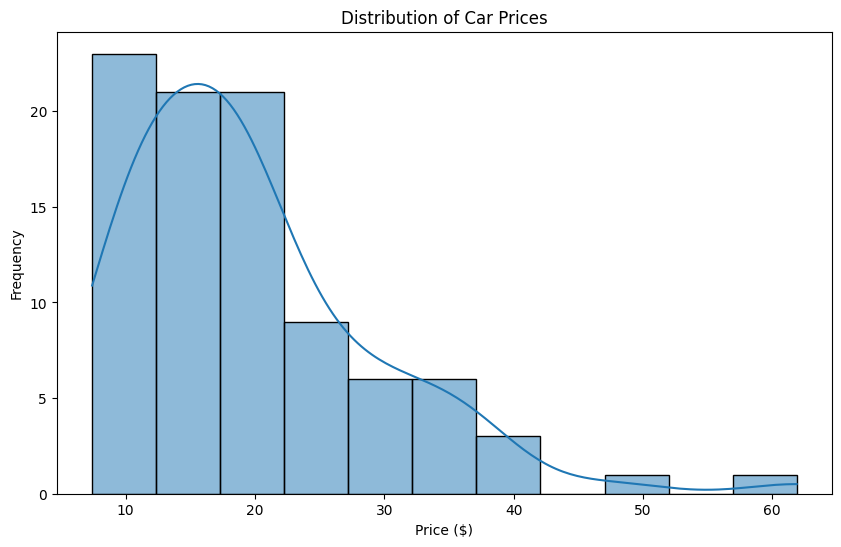

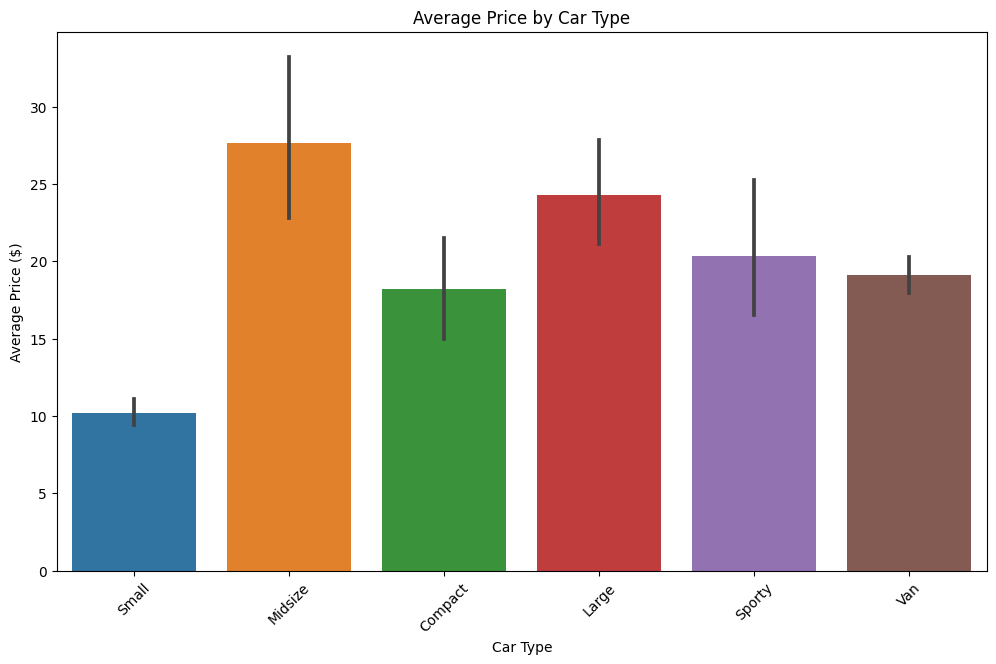

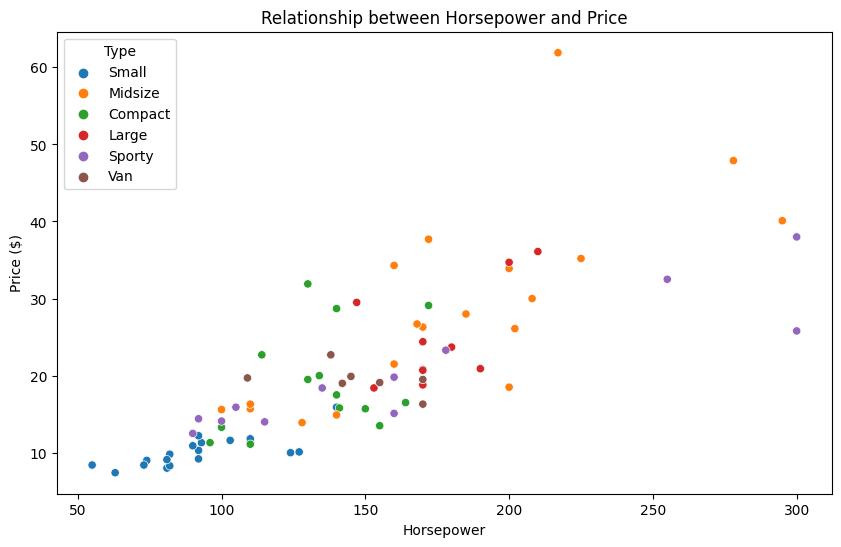

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

print(df.head())

print(df.info())

missing_data = df.isnull().sum()
print("\nMissing values for each column:\n", missing_data)

plt.figure(figsize=(10,6))
sns.histplot(df['Price'].dropna(), kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,7))
sns.barplot(x='Type', y='Price', data=df)
plt.title('Average Price by Car Type')
plt.ylabel('Average Price ($)')
plt.xlabel('Car Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Horsepower', y='Price', hue='Type', data=df)
plt.title('Relationship between Horsepower and Price')
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.show()

# Filtering Data
Filter only DataFrame with numeric attribute.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

numericDf = df.select_dtypes(include=[np.number])

print(numericDf)

    Min.Price  Price  Max.Price  MPG.city  MPG.highway  EngineSize  \
0        12.9   15.9       18.8      25.0         31.0         1.8   
1        29.2   33.9       38.7      18.0         25.0         3.2   
2        25.9   29.1       32.3      20.0         26.0         2.8   
3         NaN   37.7       44.6      19.0         26.0         NaN   
4         NaN   30.0        NaN      22.0         30.0         3.5   
..        ...    ...        ...       ...          ...         ...   
88       16.6   19.7       22.7      17.0         21.0         2.5   
89       17.6   20.0       22.4      21.0         30.0         2.0   
90       22.9   23.3       23.7      18.0         25.0         2.8   
91       21.8   22.7       23.5      21.0         28.0         2.3   
92       24.8   26.7       28.5      20.0         28.0         2.4   

    Horsepower     RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  Length  \
0        140.0  6300.0        2890.0                13.2         5.0   177.0   

# Handling Outlier

**[TODO]** Exclude the outlier (cars) with too much expensive.
* Assume that `price` of outlier is greater than `Q3 + (1.5 * IQR)`.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

attribute = 'Price'

Q1 = df[attribute].quantile(0.25)
Q3 = df[attribute].quantile(0.75)
IQR = Q3 - Q1

outlierStep = Q3 + 1.5 * IQR

filtered_df = df[df[attribute] <= outlierStep]

print(filtered_df)


   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8      25.0   
1           NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2          Audi       90  Compact       25.9   29.1       32.3      20.0   
3          Audi      100  Midsize        NaN   37.7       44.6      19.0   
4           BMW     535i  Midsize        NaN   30.0        NaN      22.0   
..          ...      ...      ...        ...    ...        ...       ...   
88   Volkswagen  Eurovan      Van       16.6   19.7       22.7      17.0   
89   Volkswagen   Passat  Compact       17.6   20.0       22.4      21.0   
90   Volkswagen  Corrado   Sporty       22.9   23.3       23.7      18.0   
91        Volvo      240  Compact       21.8   22.7       23.5      21.0   
92          NaN      850  Midsize       24.8   26.7       28.5      20.0   

    MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0          31

Draw histogram of `price`.

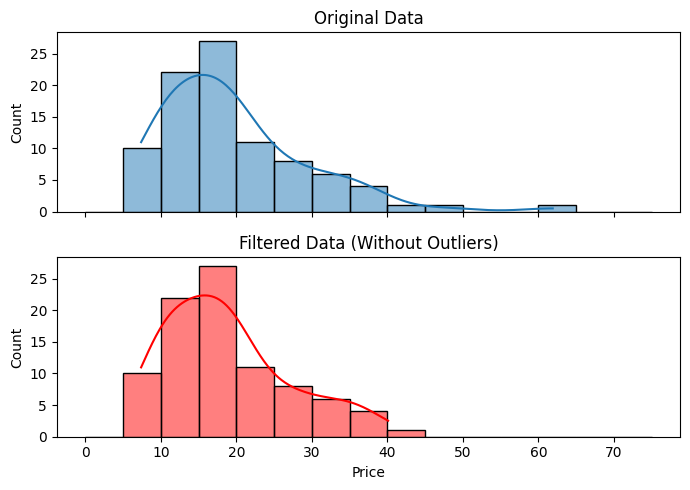

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outlierStep = Q3 + 1.5 * IQR
filtered_df = df[df['Price'] <= outlierStep]

f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x='Price', ax=axes[0], kde=True, bins=np.arange(0,80,5))
axes[0].set_title('Original Data')
sns.histplot(data=filtered_df, x='Price', color='Red', ax=axes[1], kde=True, bins=np.arange(0,80,5))
axes[1].set_title('Filtered Data (Without Outliers)')

f.tight_layout()
plt.show()

# Hanlding Missing Value
---
Last time, we dropped the NaN value, impute this time.

print the `head()` of numeric_df

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

numericDf = df.select_dtypes(include=[np.number])

numericDf.fillna(numericDf.mean(), inplace=True)

print(numericDf.head())


   Min.Price  Price  Max.Price  MPG.city  MPG.highway  EngineSize  Horsepower  \
0  12.900000   15.9  18.800000      25.0         31.0    1.800000       140.0   
1  29.200000   33.9  38.700000      18.0         25.0    3.200000       200.0   
2  25.900000   29.1  32.300000      20.0         26.0    2.800000       172.0   
3  17.118605   37.7  44.600000      19.0         26.0    2.658242       172.0   
4  17.118605   30.0  21.459091      22.0         30.0    3.500000       208.0   

      RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  Length  Wheelbase  \
0  6300.0        2890.0                13.2         5.0   177.0      102.0   
1  5500.0        2335.0                18.0         5.0   195.0      115.0   
2  5500.0        2280.0                16.9         5.0   180.0      102.0   
3  5500.0        2535.0                21.1         6.0   193.0      106.0   
4  5700.0        2545.0                21.1         4.0   186.0      109.0   

       Width  Turn.circle  Rear.seat.room  L

There are many NaN values exist.

Use `info()` to check the details.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

numericDf = df.select_dtypes(include=[np.number])

numericDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           86 non-null     float64
 1   Price               91 non-null     float64
 2   Max.Price           88 non-null     float64
 3   MPG.city            84 non-null     float64
 4   MPG.highway         91 non-null     float64
 5   EngineSize          91 non-null     float64
 6   Horsepower          86 non-null     float64
 7   RPM                 90 non-null     float64
 8   Rev.per.mile        87 non-null     float64
 9   Fuel.tank.capacity  85 non-null     float64
 10  Passengers          91 non-null     float64
 11  Length              89 non-null     float64
 12  Wheelbase           92 non-null     float64
 13  Width               87 non-null     float64
 14  Turn.circle         88 non-null     float64
 15  Rear.seat.room      89 non-null     float64
 16  Luggage.ro

**[TODO]** Impute the data with missing value with `SimpleImputer` with `median`.
---
[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [9]:
from sklearn.impute import SimpleImputer

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

numericDf = df.select_dtypes(include=[np.number])

imp_median = SimpleImputer(strategy='median')

imputed_data = imp_median.fit_transform(numericDf)

imputedNumericDf = pd.DataFrame(imputed_data, columns=numericDf.columns)

print(imputedNumericDf.head())


   Min.Price  Price  Max.Price  MPG.city  MPG.highway  EngineSize  Horsepower  \
0       12.9   15.9      18.80      25.0         31.0         1.8       140.0   
1       29.2   33.9      38.70      18.0         25.0         3.2       200.0   
2       25.9   29.1      32.30      20.0         26.0         2.8       172.0   
3       14.6   37.7      44.60      19.0         26.0         2.3       172.0   
4       14.6   30.0      19.15      22.0         30.0         3.5       208.0   

      RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  Length  Wheelbase  \
0  6300.0        2890.0                13.2         5.0   177.0      102.0   
1  5500.0        2335.0                18.0         5.0   195.0      115.0   
2  5500.0        2280.0                16.9         5.0   180.0      102.0   
3  5500.0        2535.0                21.1         6.0   193.0      106.0   
4  5700.0        2545.0                21.1         4.0   186.0      109.0   

   Width  Turn.circle  Rear.seat.room  Lugga

Check through `info()` that NaN values don't exist any more.

In [10]:
imputedNumericDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           93 non-null     float64
 1   Price               93 non-null     float64
 2   Max.Price           93 non-null     float64
 3   MPG.city            93 non-null     float64
 4   MPG.highway         93 non-null     float64
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     float64
 7   RPM                 93 non-null     float64
 8   Rev.per.mile        93 non-null     float64
 9   Fuel.tank.capacity  93 non-null     float64
 10  Passengers          93 non-null     float64
 11  Length              93 non-null     float64
 12  Wheelbase           93 non-null     float64
 13  Width               93 non-null     float64
 14  Turn.circle         93 non-null     float64
 15  Rear.seat.room      93 non-null     float64
 16  Luggage.ro

**[TODO]** Impute the data with missing value with `Knn imputation
` with `n_neighbors = 2` and give weight by `distance`


In [11]:
from sklearn.impute import KNNImputer

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

numericDf = df.select_dtypes(include=[np.number])

imp_KNN = KNNImputer(n_neighbors=2, weights='distance')

imputed_data_KNN = imp_KNN.fit_transform(numericDf)

imputeDF_KNN = pd.DataFrame(imputed_data_KNN, columns=numericDf.columns)

print(imputeDF_KNN.head())


   Min.Price  Price  Max.Price  MPG.city  MPG.highway  EngineSize  Horsepower  \
0  12.900000   15.9   18.80000      25.0         31.0    1.800000       140.0   
1  29.200000   33.9   38.70000      18.0         25.0    3.200000       200.0   
2  25.900000   29.1   32.30000      20.0         26.0    2.800000       172.0   
3  28.332082   37.7   44.60000      19.0         26.0    3.097892       172.0   
4  17.737339   30.0   21.95971      22.0         30.0    3.500000       208.0   

      RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  Length  Wheelbase  \
0  6300.0        2890.0                13.2         5.0   177.0      102.0   
1  5500.0        2335.0                18.0         5.0   195.0      115.0   
2  5500.0        2280.0                16.9         5.0   180.0      102.0   
3  5500.0        2535.0                21.1         6.0   193.0      106.0   
4  5700.0        2545.0                21.1         4.0   186.0      109.0   

      Width  Turn.circle  Rear.seat.room  Lu

# Balancing Data

Draw a catplot plotting the x-axis using `DrivenTrain` and set the type of plot to be drawn to `count`.
[catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

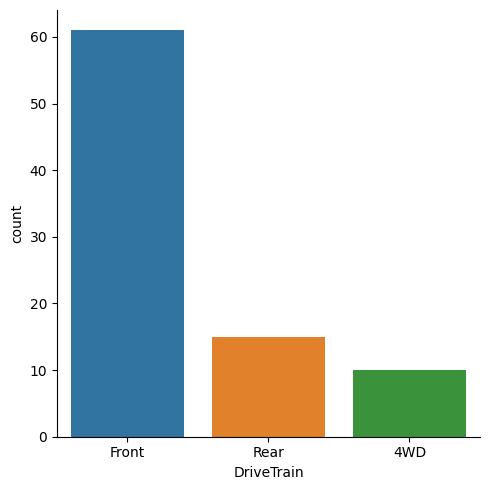

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

sns.catplot(data=df, x='DriveTrain', kind='count')

plt.tight_layout()
plt.show()


**[TODO]** Undersample the `Front` and `Rear` cars as much as `4WD` cars.

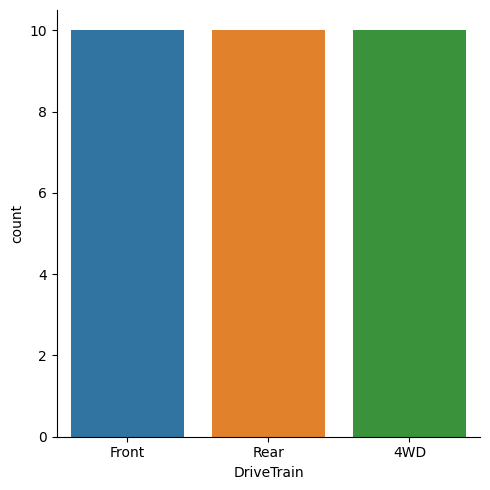

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

num_Front = df[df['DriveTrain'] == 'Front'].shape[0]
num_Rear = df[df['DriveTrain'] == 'Rear'].shape[0]
num_4WD = df[df['DriveTrain'] == '4WD'].shape[0]

sampled_Front = df[df['DriveTrain'] == 'Front'].sample(num_4WD)
sampled_Rear = df[df['DriveTrain'] == 'Rear'].sample(num_4WD)
all_4WD = df[df['DriveTrain'] == '4WD']

undersampledDf = pd.concat([sampled_Front, sampled_Rear, all_4WD])

sns.catplot(data=undersampledDf, kind="count", x='DriveTrain')
plt.tight_layout()
plt.show()


## Oversampling

Add column `DriveTrain` from `df` to `imputedNumericDf` which was used for knn imputer above. And drop the sample with missing value on `DriveTrain` using `.dropna()` method of `pd`.

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

numericDf = df.select_dtypes(include=[np.number])

from sklearn.impute import KNNImputer
imp_KNN = KNNImputer(n_neighbors=2, weights='distance')
imputed_data_KNN = imp_KNN.fit_transform(numericDf)
imputedNumericDf = pd.DataFrame(imputed_data_KNN, columns=numericDf.columns)

imputedNumericDf['DriveTrain'] = df['DriveTrain']

imputedNumericDf = imputedNumericDf.dropna(subset=['DriveTrain'])


**[TODO]** By using SMOTE, resample all classes but the majority class, `Front`. Pleaser check the parameter, `sampling_strategy`, in [[ref](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)].

In [15]:
from imblearn.over_sampling import SMOTE


X = imputedNumericDf.drop('DriveTrain', axis=1)
y = imputedNumericDf['DriveTrain']

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=imputedNumericDf.columns.drop('DriveTrain'))
df_resampled['DriveTrain'] = y_resampled

df_resampled


,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,DriveTrain
0,12.900000,15.900000,18.800000,25.000000,31.000000,1.800000,140.000000,6300.000000,2890.000000,13.200000,5.000000,177.000000,102.000000,68.000000,37.000000,26.500000,13.053113,2705.000000,Front
1,29.200000,33.900000,38.700000,18.000000,25.000000,3.200000,200.000000,5500.000000,2335.000000,18.000000,5.000000,195.000000,115.000000,71.000000,38.000000,30.000000,15.000000,3560.000000,Front
2,25.900000,29.100000,32.300000,20.000000,26.000000,2.800000,172.000000,5500.000000,2280.000000,16.900000,5.000000,180.000000,102.000000,67.000000,37.000000,28.000000,14.000000,3375.000000,Front
3,17.737339,30.000000,21.959710,22.000000,30.000000,3.500000,208.000000,5700.000000,2545.000000,21.100000,4.000000,186.000000,109.000000,69.000000,39.000000,27.000000,13.000000,3640.000000,Rear
4,19.900000,20.800000,22.126434,19.000000,28.000000,3.800000,170.000000,4800.000000,1576.175471,18.041170,6.000000,200.000000,111.000000,74.000000,42.000000,30.500000,17.000000,3470.000000,Front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,42.085138,58.423928,74.774305,19.623899,25.463476,3.095718,206.919392,5453.652376,2243.753157,18.036524,5.000000,189.589692,109.420655,68.768262,36.652393,28.431907,14.652393,3454.899219,Rear
179,19.182793,20.106000,21.029207,18.136897,26.273793,4.435724,185.893103,4254.758630,1776.680077,19.391931,5.726207,209.398965,112.220345,77.452414,43.000000,29.315517,19.904827,3852.803432,Rear
180,29.954918,31.428897,32.940546,17.246596,25.623298,5.014372,198.698944,4373.978876,1644.115026,21.130106,6.348629,217.869894,116.623298,77.376702,45.000000,31.123298,21.623298,4073.835094,Rear
181,33.897291,41.826941,49.823501,22.602792,27.676408,2.597808,158.788128,5232.359210,2357.165905,15.823592,5.000000,180.460391,106.654490,67.661796,34.992694,26.910174,12.992694,3120.193305,Rear



Show the smote results as a plot.

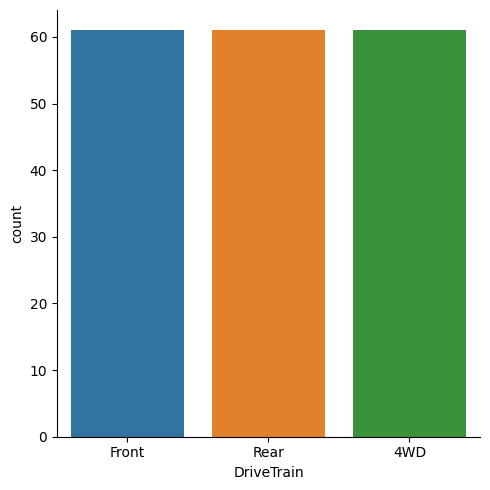

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df_resampled, kind="count", x='DriveTrain')

plt.tight_layout()

plt.show()
